In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import glob

In [6]:
# read in the data frame
df = pd.read_parquet("~/Documents/UMontana/Research/YNP/AHQsd/AHQsd_analyses/AHQsd_genotypes.parquet")#, index_col=False)

In [7]:
# replace -1 with NaNs 
df = df.replace(-1,np.NaN)

In [8]:
nans = df.isna().sum()

In [9]:
# only keep individuals who have at least 1000 SNPs 
df_indFilt = df[df.sum(axis=1) > 20000]

In [10]:
nans = df_indFilt.isna().sum()

In [11]:
nans = df_indFilt.isna().sum(axis=0)

<AxesSubplot:ylabel='Frequency'>

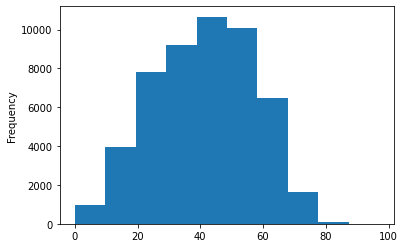

In [12]:
nans.plot.hist()

In [9]:
# rename columns with positive controls
df_indFilt = df.replace(to_replace='AHQsd_5.11C', value="T_plate5_pos_control")
df_indFilt = df_indFilt.replace(to_replace='AHQsd_6.05B', value="N_plate6_pos_control")
df_indFilt = df_indFilt.replace(to_replace='AHQsd_1.08A', value="F1C_plate1_pos_control")
df_indFilt = df_indFilt.replace(to_replace='AHQsd_1.08E', value="N_plate1_pos_control")

In [10]:
# transpose it to look at the sites
tdf = df_indFilt.set_index('indv').T

In [74]:
# only keep sites where the there are at least 100 SNPs (this is conservative)
#tdf_siteFilt = tdf[tdf.isna().sum(axis=1) < 40]

In [76]:
# make a positive control spreadsheet to explore which sites are segregating
#df_pos_controls = df_indFilt[(df_indFilt['indv'] == "T_plate5_pos_control") |
 #                           (df_indFilt['indv'] == "N_plate6_pos_control") |
     #                       (df_indFilt['indv'] == "F1C_plate1_pos_control")|
 #                           (df_indFilt['indv'] == "N_plate1_pos_control")]

In [30]:
#transpose
df_pos_controls_T = df_pos_controls.set_index('indv').T

In [16]:
#only keep SNPs present in both of the positive controls
pos_controls_filt = df_pos_controls_T[df_pos_controls_T.isna().sum(axis=1) == 0]

NameError: name 'df_pos_controls_T' is not defined

In [34]:
#pos_controls_filt = pos_controls_filt[pos_controls_filt['T_plate5_pos_control'] != pos_controls_filt['N_plate6_pos_control']]

In [53]:
# use apply to make a table with the lists of genotype counts per individual
# filt_df_indvs = tdf_siteFilt.apply(pd.Series.value_counts, axis=0)

In [12]:
# use apply to make a table with the lists of genotype counts per site
# filt_df_sites = tdf_siteFilt.apply(pd.Series.value_counts, axis=1)


In [18]:
# remove sites where the T and N positive controls are heterozygotes 
#pos_controls_filt = pos_controls_filt[pos_controls_filt['T_plate5_pos_control'] != 1.0]
#pos_controls_filt = pos_controls_filt[pos_controls_filt['N_plate6_pos_control'] != 1.0]
#AHQsd_genotypes_filt = tdf_siteFilt[tdf_siteFilt['N_plate1_pos_control'] != 1.0]

In [11]:
# only keep sites that are segregating between T and N 
AHQsd_genotypes_filt = tdf.dropna(subset=['N_plate6_pos_control'])
AHQsd_genotypes_filt = AHQsd_genotypes_filt.dropna(subset=['T_plate5_pos_control'])



In [12]:
AHQsd_genotypes_filt = AHQsd_genotypes_filt[AHQsd_genotypes_filt['T_plate5_pos_control'] != AHQsd_genotypes_filt['N_plate6_pos_control']]

In [13]:
AHQsd_genotypes_filt = AHQsd_genotypes_filt[AHQsd_genotypes_filt['T_plate5_pos_control'] != 1.0]
AHQsd_genotypes_filt = AHQsd_genotypes_filt[AHQsd_genotypes_filt['N_plate6_pos_control'] != 1.0]

In [21]:
#AHQsd_genotypes_filt.to_csv('AHQsd_test.csv')

In [14]:
x = AHQsd_genotypes_filt.pop('T_plate5_pos_control')
y = AHQsd_genotypes_filt.pop('N_plate6_pos_control')

In [15]:
AHQsd_genotypes_filt.insert(loc= 0 , column= 'T_plate5_pos_control', value= x)

In [16]:
AHQsd_genotypes_filt.insert(loc= 1 , column= 'N_plate6_pos_control', value= y)

In [28]:
#AHQsd_genotypes_filt.count[[0.0, 1.0, 2.0]].sum(axis=1)

In [17]:
AHQsd_genotypes_indFilt = AHQsd_genotypes_filt[AHQsd_genotypes_filt.isna().sum(axis=1) < 1000]

In [305]:
choiceList = ['TT', 'NN','NoCall']
all_indvs = AHQsd_genotypes_filt.columns
for i in all_indvs:
    condList = [(AHQsd_genotypes_filt[i] == AHQsd_genotypes_filt['T_plate5_pos_control']),
                (AHQsd_genotypes_filt[i] == AHQsd_genotypes_filt['N_plate6_pos_control']),
                (AHQsd_genotypes_filt[i] == 1.0)]
    AHQsd_genotypes_filt[i] = np.select(condList, choiceList)

In [309]:
AHQsd_genotypes_filt.where(AHQsd_genotypes_filt['AHQsd_5.01A'] == AHQsd_genotypes_filt['N_plate6_pos_control'], 'NN')

indv,T_plate5_pos_control,N_plate6_pos_control,AHQsd_5.01A,AHQsd_5.01B,AHQsd_5.01C,AHQsd_5.01D,AHQsd_5.01E,AHQsd_5.01F,AHQsd_5.01G,AHQsd_5.01H,...,AHQsd_3.11G,AHQsd_3.11H,AHQsd_3.12A,AHQsd_3.12B,AHQsd_3.12C,AHQsd_3.12D,AHQsd_3.12E,AHQsd_3.12F,AHQsd_3.12G,AHQsd_3.12H
site,,,,,,,,,,,,,,,,,,,,,
14_16156,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
14_16421,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
14_23137,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
14_23146,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
14_158451,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_24115939,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
11_24127422,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN
11_24127605,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN,...,NN,NN,NN,NN,NN,NN,NN,NN,NN,NN


In [157]:
AHQsd_genotypes_filt[i] == AHQsd_genotypes_filt['N_plate6_pos_control']

site
14_16156       False
14_16421       False
14_23137       False
14_23146       False
14_158451      False
               ...  
11_24115939    False
11_24127422    False
11_24127605    False
11_24127744    False
11_24128018    False
Length: 3456, dtype: bool

In [40]:
nans = AHQsd_genotypes_filt.isna().sum()

In [132]:
nans

indv
AHQsd_5.01A    3203
AHQsd_5.01B     287
AHQsd_5.01C      28
AHQsd_5.01D     368
AHQsd_5.01E    2966
               ... 
AHQsd_3.12D     872
AHQsd_3.12E    2144
AHQsd_3.12F    3280
AHQsd_3.12G    1710
AHQsd_3.12H    3405
Length: 384, dtype: int64

In [170]:
AHQsd_genotypes_filt_lepMap

indv,AHQsd_5.01A,AHQsd_5.01B,AHQsd_5.01C,AHQsd_5.01D,AHQsd_5.01E,AHQsd_5.01F,AHQsd_5.01G,AHQsd_5.01H,AHQsd_5.02A,AHQsd_5.02B,...,AHQsd_3.11G,AHQsd_3.11H,AHQsd_3.12A,AHQsd_3.12B,AHQsd_3.12C,AHQsd_3.12D,AHQsd_3.12E,AHQsd_3.12F,AHQsd_3.12G,AHQsd_3.12H
site,,,,,,,,,,,,,,,,,,,,,
14_16156,NoCall,NoCall,BB,AA,NoCall,AA,AA,AA,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
14_16421,NoCall,AB,BB,AA,NoCall,AB,AA,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
14_23137,NoCall,AB,AA,BB,NoCall,BB,BB,BB,BB,NoCall,...,BB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,AA,NoCall
14_23146,AA,AB,BB,AA,NoCall,AA,AA,AA,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,BB,NoCall
14_158451,NoCall,AB,BB,AB,AA,AA,AA,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_24115939,NoCall,AB,AA,AB,NoCall,AB,AB,AB,AB,AB,...,AB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
11_24127422,NoCall,AB,AB,AB,NoCall,AB,AB,AB,AB,AB,...,AB,AA,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
11_24127605,NoCall,AA,AA,AA,NoCall,AA,AA,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,AA,AA,AA,AA,NoCall


In [144]:
for i in AHQsd_genotypes_filt.columns:
    AHQsd_genotypes_filt[i].replace('0',np.nan,inplace=True)

In [18]:
AHQsd_genotypes_filt_lepMap = AHQsd_genotypes_filt.replace(to_replace=1.0, value="AB")
AHQsd_genotypes_filt_lepMap.replace(to_replace=2.0, value="BB", inplace=True)
AHQsd_genotypes_filt_lepMap.replace(to_replace=0.0, value="AA", inplace=True)
AHQsd_genotypes_filt_lepMap.replace(to_replace=np.nan, value="NoCall", inplace=True)
#AHQsd_genotypes_filt_lepMap = AHQsd_genotypes_filt.replace(to_replace=1.0, value="AB")

In [35]:
AHQsd_genotypes_filt_lepMap

indv,T_plate5_pos_control,N_plate6_pos_control,AHQsd_5.01A,AHQsd_5.01B,AHQsd_5.01C,AHQsd_5.01D,AHQsd_5.01E,AHQsd_5.01F,AHQsd_5.01G,AHQsd_5.01H,...,AHQsd_3.11G,AHQsd_3.11H,AHQsd_3.12A,AHQsd_3.12B,AHQsd_3.12C,AHQsd_3.12D,AHQsd_3.12E,AHQsd_3.12F,AHQsd_3.12G,AHQsd_3.12H
site,,,,,,,,,,,,,,,,,,,,,
14_16156,AA,BB,NoCall,NoCall,BB,AA,NoCall,AA,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
14_16421,AA,BB,NoCall,AB,BB,AA,NoCall,AB,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
14_23137,BB,AA,NoCall,AB,AA,BB,NoCall,BB,BB,BB,...,BB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,AA,NoCall
14_23146,AA,BB,AA,AB,BB,AA,NoCall,AA,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,BB,NoCall
14_158451,AA,BB,NoCall,AB,BB,AB,AA,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_24115939,AA,BB,NoCall,AB,AA,AB,NoCall,AB,AB,AB,...,AB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
11_24127422,AA,BB,NoCall,AB,AB,AB,NoCall,AB,AB,AB,...,AB,AA,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
11_24127605,AA,BB,NoCall,AA,AA,AA,NoCall,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,AA,AA,AA,AA,NoCall


In [19]:
AHQsd_genotypes_filt_lepMap = AHQsd_genotypes_filt_lepMap.reset_index()

In [20]:
AHQsd_genotypes_filt_lepMap.rename(columns={"site":"SNP"})

indv,SNP,T_plate5_pos_control,N_plate6_pos_control,AHQsd_5.01A,AHQsd_5.01B,AHQsd_5.01C,AHQsd_5.01D,AHQsd_5.01E,AHQsd_5.01F,AHQsd_5.01G,...,AHQsd_3.11G,AHQsd_3.11H,AHQsd_3.12A,AHQsd_3.12B,AHQsd_3.12C,AHQsd_3.12D,AHQsd_3.12E,AHQsd_3.12F,AHQsd_3.12G,AHQsd_3.12H
0,14_16156,AA,BB,NoCall,NoCall,BB,AA,NoCall,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
1,14_16421,AA,BB,NoCall,AB,BB,AA,NoCall,AB,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
2,14_23137,BB,AA,NoCall,AB,AA,BB,NoCall,BB,BB,...,BB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,AA,NoCall
3,14_23146,AA,BB,AA,AB,BB,AA,NoCall,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,BB,NoCall
4,14_158451,AA,BB,NoCall,AB,BB,AB,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,11_24115939,AA,BB,NoCall,AB,AA,AB,NoCall,AB,AB,...,AB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
3452,11_24127422,AA,BB,NoCall,AB,AB,AB,NoCall,AB,AB,...,AB,AA,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
3453,11_24127605,AA,BB,NoCall,AA,AA,AA,NoCall,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,AA,AA,AA,AA,NoCall
3454,11_24127744,AA,BB,NoCall,AB,AB,AB,NoCall,AB,AB,...,AB,AA,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall


In [182]:
AHQsd_genotypes_filt.to_csv("AHQsd_genotypes_filt.csv")

In [21]:
#AHQsd_genotypes_filt_lepMap = AHQsd_genotypes_filt_lepMap.drop('F1C_plate1_pos_control', 1)
AHQsd_genotypes_filt_lepMap = AHQsd_genotypes_filt_lepMap.drop('N_plate1_pos_control', 1)

In [22]:
AHQsd_genotypes_filt_lepMap.to_csv("AHQsd_genotypes_filt_lepMap_.txt", index=False, sep='\t')

In [191]:
AHQsd_genotypes_filt_lepMap

indv,site,AHQsd_5.01A,AHQsd_5.01B,AHQsd_5.01C,AHQsd_5.01D,AHQsd_5.01E,AHQsd_5.01F,AHQsd_5.01G,AHQsd_5.01H,AHQsd_5.02A,...,AHQsd_3.11G,AHQsd_3.11H,AHQsd_3.12A,AHQsd_3.12B,AHQsd_3.12C,AHQsd_3.12D,AHQsd_3.12E,AHQsd_3.12F,AHQsd_3.12G,AHQsd_3.12H
0,14_16156,NoCall,NoCall,BB,AA,NoCall,AA,AA,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
1,14_16421,NoCall,AB,BB,AA,NoCall,AB,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,BB,NoCall
2,14_23137,NoCall,AB,AA,BB,NoCall,BB,BB,BB,BB,...,BB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,AA,NoCall
3,14_23146,AA,AB,BB,AA,NoCall,AA,AA,AA,AA,...,AA,NoCall,NoCall,NoCall,NoCall,AB,NoCall,NoCall,BB,NoCall
4,14_158451,NoCall,AB,BB,AB,AA,AA,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall,NoCall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,11_24115939,NoCall,AB,AA,AB,NoCall,AB,AB,AB,AB,...,AB,NoCall,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
3452,11_24127422,NoCall,AB,AB,AB,NoCall,AB,AB,AB,AB,...,AB,AA,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall
3453,11_24127605,NoCall,AA,AA,AA,NoCall,AA,AA,AA,AA,...,AA,AA,NoCall,NoCall,NoCall,AA,AA,AA,AA,NoCall
3454,11_24127744,NoCall,AB,AB,AB,NoCall,AB,AB,AB,AB,...,AB,AA,NoCall,NoCall,NoCall,AB,NoCall,AA,AB,NoCall


In [35]:
list(AHQsd_genotypes_filt_lepMap)

['site',
 'AHQsd_5.01B',
 'AHQsd_5.01C',
 'AHQsd_5.01D',
 'AHQsd_5.01F',
 'AHQsd_5.01G',
 'AHQsd_5.01H',
 'AHQsd_5.02A',
 'AHQsd_5.02B',
 'AHQsd_5.02C',
 'AHQsd_5.02E',
 'AHQsd_5.02F',
 'AHQsd_5.02G',
 'AHQsd_5.02H',
 'AHQsd_5.03A',
 'AHQsd_5.03B',
 'AHQsd_5.03C',
 'AHQsd_5.03D',
 'AHQsd_5.03E',
 'AHQsd_5.03F',
 'AHQsd_5.03G',
 'AHQsd_5.03H',
 'AHQsd_5.04C',
 'AHQsd_5.04D',
 'AHQsd_5.04E',
 'AHQsd_5.04F',
 'AHQsd_5.04G',
 'AHQsd_5.04H',
 'AHQsd_5.05A',
 'AHQsd_5.05C',
 'AHQsd_5.05D',
 'AHQsd_5.05E',
 'AHQsd_5.05F',
 'AHQsd_5.05G',
 'AHQsd_5.05H',
 'AHQsd_5.06A',
 'AHQsd_5.06B',
 'AHQsd_5.06C',
 'AHQsd_5.06D',
 'AHQsd_5.06E',
 'AHQsd_5.06F',
 'AHQsd_5.06G',
 'AHQsd_5.06H',
 'AHQsd_5.07A',
 'AHQsd_5.07B',
 'AHQsd_5.07C',
 'AHQsd_5.07D',
 'AHQsd_5.07E',
 'AHQsd_5.07F',
 'AHQsd_5.07G',
 'AHQsd_5.07H',
 'AHQsd_5.08A',
 'AHQsd_5.08B',
 'AHQsd_5.08C',
 'AHQsd_5.08D',
 'AHQsd_5.08E',
 'AHQsd_5.08F',
 'AHQsd_5.08G',
 'AHQsd_5.08H',
 'AHQsd_5.09A',
 'AHQsd_5.09B',
 'AHQsd_5.09C',
 'AHQsd_5.09D',